In [99]:
# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000
%matplotlib inline

In [100]:
# load train set
df = pd.read_csv("https://raw.githubusercontent.com/MathewJohn1986/Team-8-Predict/main/df-train_set.csv")

In [101]:
# First view of the train set
df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [12]:
df.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [4]:
df.shape

(64376, 13)

In [102]:
#filtering out the Apple golden delicious
apples_df_filter = df[df['Commodities']== 'APPLE GOLDEN DELICIOUS']
apples_df = apples_df_filter.copy()
apples_df.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [103]:
#shape of the new train data
apples_df.shape

(1952, 13)

In [104]:
#descriptive statistics summary
apples_df.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


In [105]:
#summary of avg_price_per_kg
apples_df['avg_price_per_kg'].describe()

count    1952.000000
mean        6.778893
std         2.248744
min         0.250000
25%         5.460000
50%         6.670000
75%         8.280000
max        21.240000
Name: avg_price_per_kg, dtype: float64

<AxesSubplot:xlabel='avg_price_per_kg', ylabel='Density'>

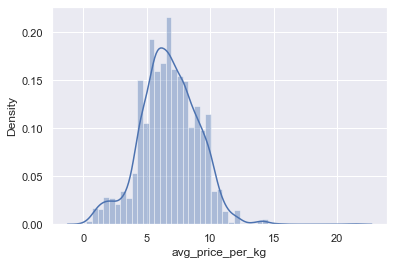

In [106]:
#histogram
sns.distplot(apples_df['avg_price_per_kg'])
#or use the ff code
# sns.displot(apples_df['avg_price_per_kg'])

This above histogram:
**- Deviate from the normal distribution**
**- slightly positive skewness almost normal **
**- showed peakness **

In [107]:
#skewness and kurtosis
print("Skewness: %f" % apples_df['avg_price_per_kg'].skew())
print("Kurtosis: %f" % apples_df['avg_price_per_kg'].kurt())

Skewness: 0.082452
Kurtosis: 1.042921


The avg_price_per_kg with a skewness of approx. 0.082 indicates moderate positive skew. The Kurtosis is low < 3 therefore means there is lack of outliers with this variable.




### Relationship of avg_price_per_kg with numerical variables



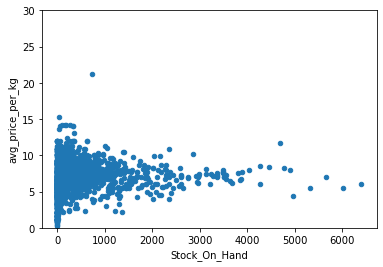

In [11]:
#scatter plot Stock_On_Hand/avg_price_per_kg
var = 'Stock_On_Hand'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

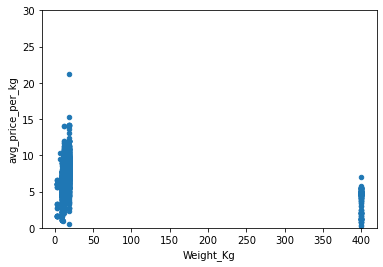

In [12]:
#scatter Weight_Kg/avg_price_per_kg
var = 'Weight_Kg'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

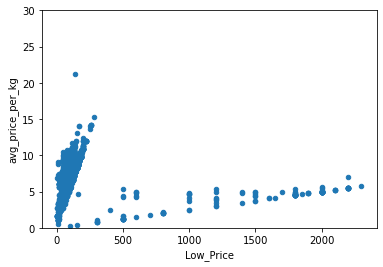

In [13]:
#scatter plot Low_Price/avg_price_per_kg
var = 'Low_Price'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

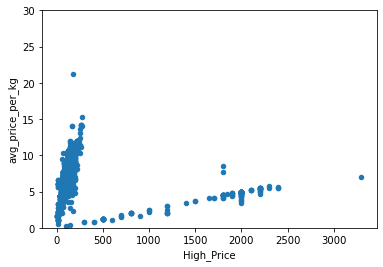

In [14]:
#scatter plot High_Price/avg_price_per_kg
var = 'High_Price'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

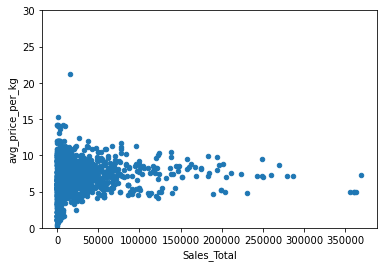

In [15]:
#scatter plot Sales_Total/avg_price_per_kg
var = 'Sales_Total'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

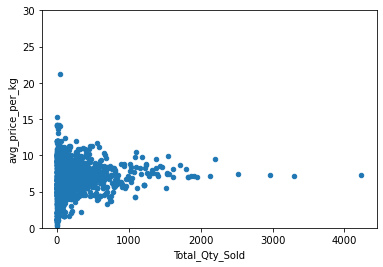

In [16]:
#scatter plot Total_Qty_Sold/avg_price_per_kg
var = 'Total_Qty_Sold'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

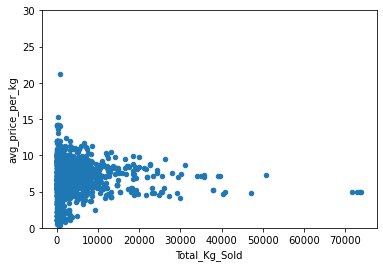

In [17]:
#scatter plot Total_Kg_Sold/avg_price_per_kg
var = 'Total_Kg_Sold'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
data.plot.scatter(x=var, y='avg_price_per_kg', ylim=(0,30));

#### Analysis using sweetviz


In [18]:
#import sweetviz as sv
#analyze_report = sv.analyze(apples_df)
#analyze_report.show_html('analyze.html', open_browser = False)

In [19]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test

In [20]:
#compare_report = sv.compare([x_train, 'Train'], [x_test, 'Test'])
#compare_rep

### Relationship of avg_price_per_kg with categorical features


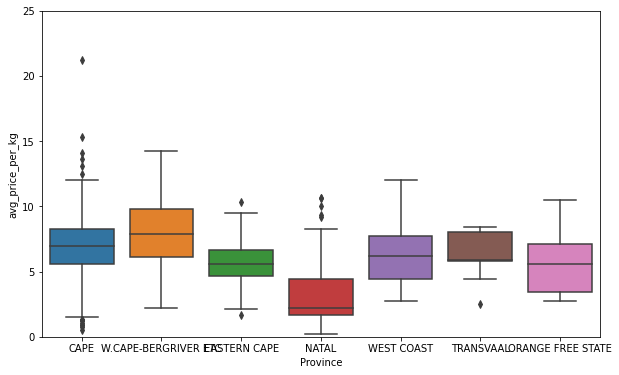

In [21]:
#box plot Province/avg_price_per_kg
var = 'Province'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

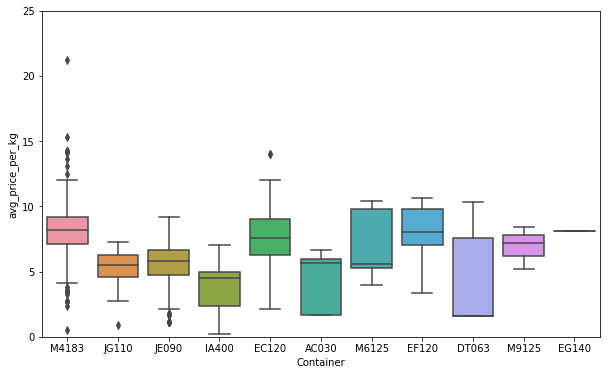

In [22]:
#box plot container/avg_price_per_kg
var = 'Container'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

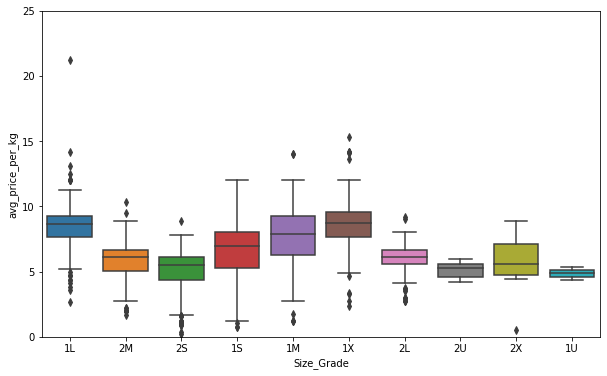

In [23]:
#box plot Size_Grade/avg_price_per_kg
var = 'Size_Grade'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

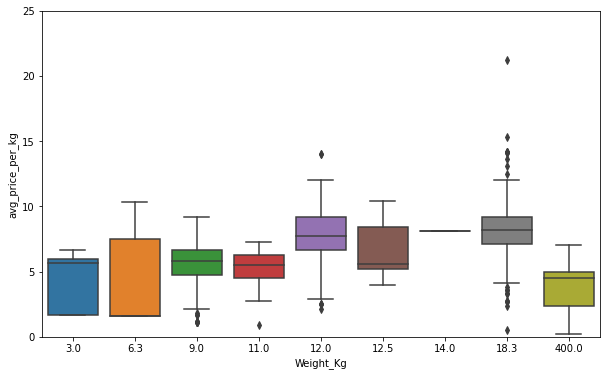

In [24]:
#box plot weight/avg_price_per_kg
var = 'Weight_Kg'
data = pd.concat([apples_df['avg_price_per_kg'], apples_df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x=var, y="avg_price_per_kg", data=data)
fig.axis(ymin=0, ymax=25);

## Multiple variable analysis


In [25]:
apples_df.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


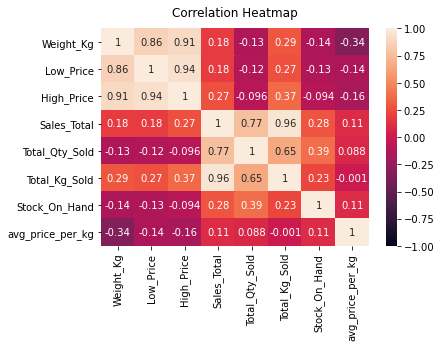

In [26]:
#correlation matrix
heatmap = sns.heatmap(apples_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**According to the heatmap above**
- Sales_Total, Total_Qty_Sold, Stock_on_hand have weak positive correlation with avg_price_per_kg.
- Weight_Kg , Low_price, High_price and Total_kg_Sold have weak negative correlation with avg_price_per_kg.

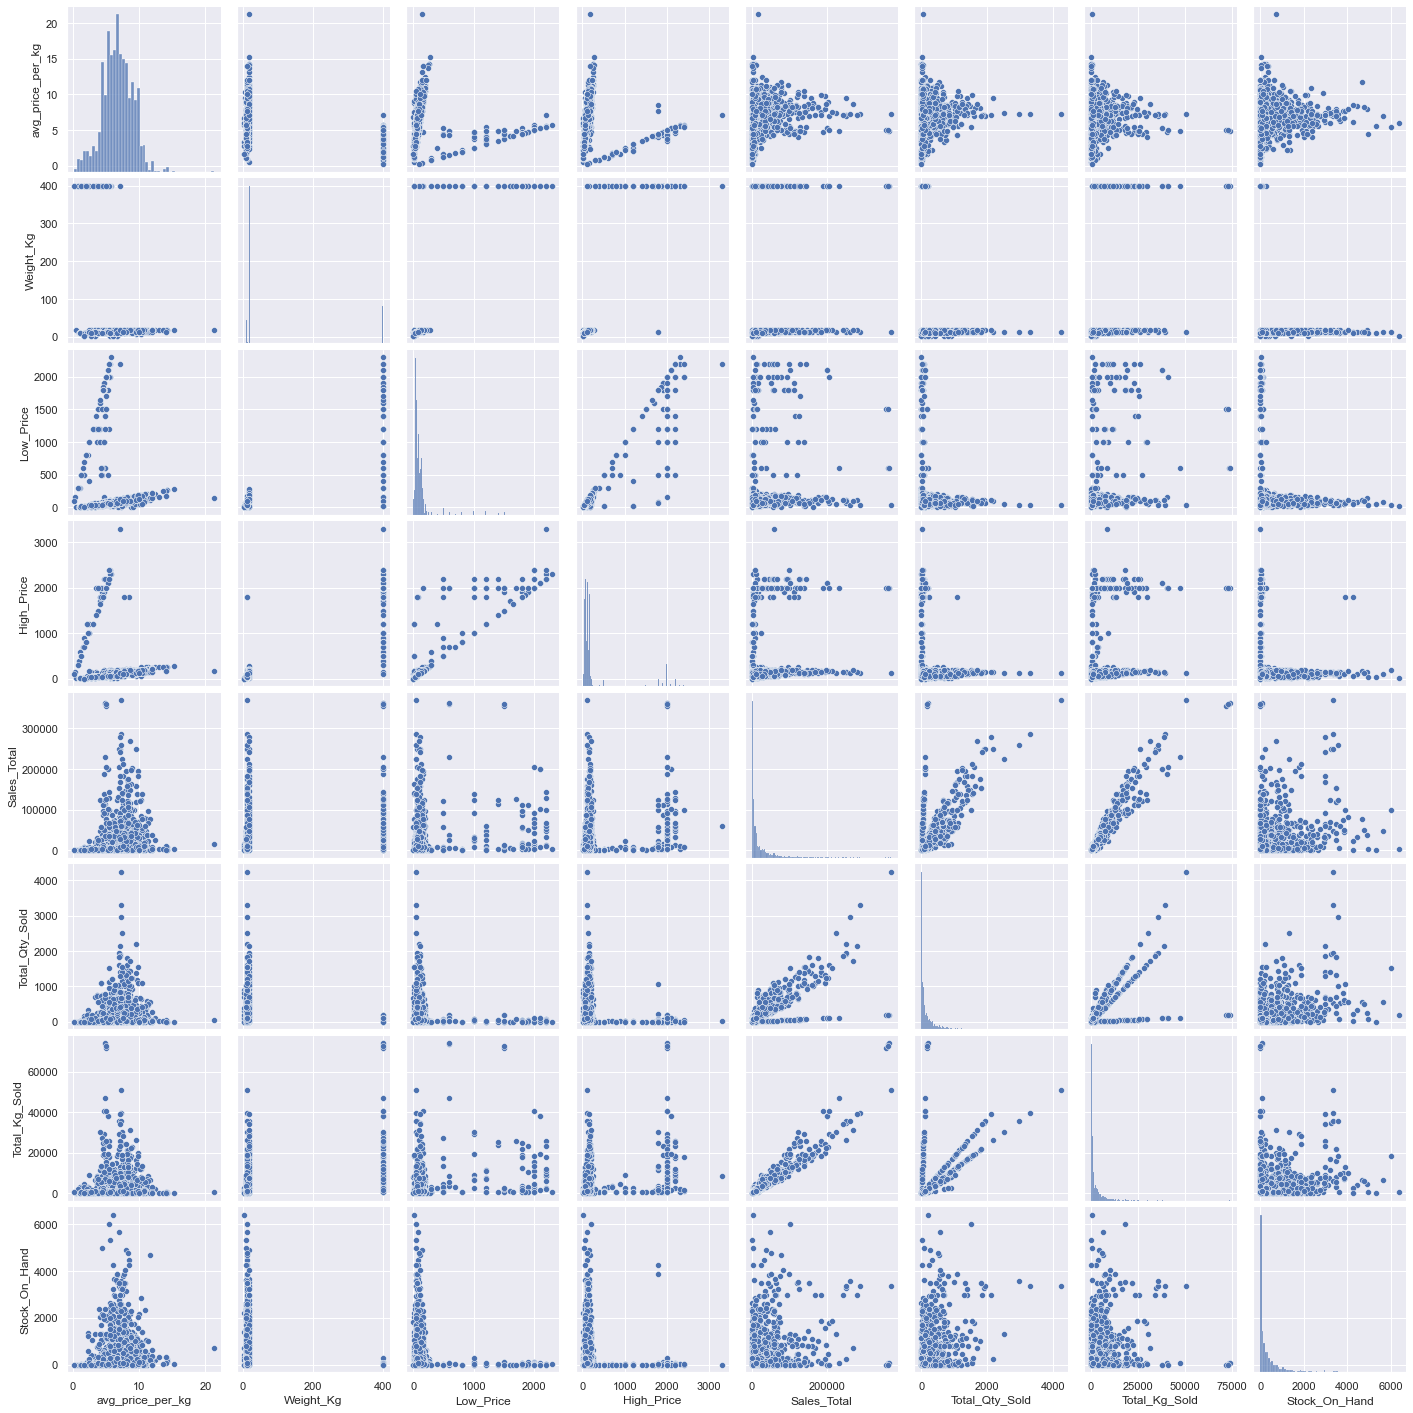

In [27]:
#scatterplot
sns.set()
cols = ['avg_price_per_kg', 'Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Total_Kg_Sold', 'Stock_On_Hand']
sns.pairplot(apples_df[cols], height = 2.5)
plt.show();

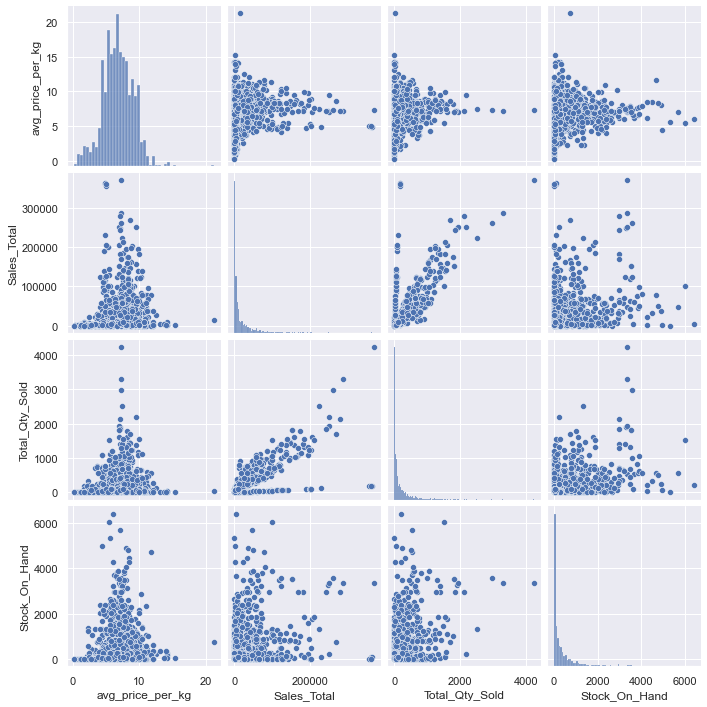

In [29]:
# positive correlation
sns.set()
cols = ['avg_price_per_kg', 'Sales_Total', 'Total_Qty_Sold', 'Stock_On_Hand']
sns.pairplot(apples_df[cols], height = 2.5)
plt.show();

**Standardising data to check for outliers **

In [30]:
#standardizing data
avg_price_perkg_scaled = StandardScaler().fit_transform(apples_df['avg_price_per_kg'][:,np.newaxis]);
low_range = avg_price_perkg_scaled[avg_price_perkg_scaled[:,0].argsort()][:10]
high_range= avg_price_perkg_scaled[avg_price_perkg_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.90409459]
 [-2.84626974]
 [-2.77065263]
 [-2.68169132]
 [-2.68169132]
 [-2.62386646]
 [-2.62386646]
 [-2.61052227]
 [-2.55714548]
 [-2.52156096]]

outer range (high) of the distribution:
[[3.0607613 ]
 [3.21199552]
 [3.21199552]
 [3.25647618]
 [3.3054049 ]
 [3.3054049 ]
 [3.3054049 ]
 [3.3054049 ]
 [3.79024404]
 [6.43239497]]


What does this mean?
 - Low range values are the same and not too far from 0
 - High range values are also similar but the 6.43239497 is far apart  and far from zero 
 - a possible outlier is 6.43239497

Drop outliers

In [32]:
#dQ1 = df.quantile(0.25)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

apples_df = apples_df[~((apples_df < (Q1 - 1.5 * IQR)) |(apples_df > (Q3 + 1.5 * IQR))).any(axis=1)]

### Normality

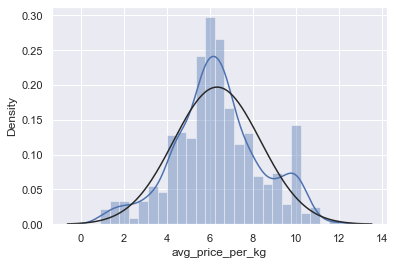

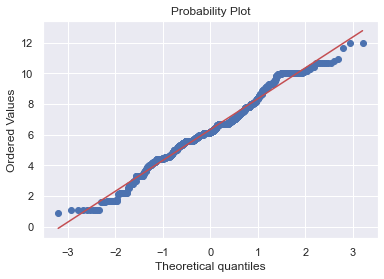

In [33]:
#histogram and normal probability plot

sns.distplot(apples_df['avg_price_per_kg'], fit=norm);
figure = plt.figure()
prob_plot = stats.probplot(apples_df['avg_price_per_kg'], plot=plt)

avg_price_per_kg is almost normal but not normal and shows some peakness, a slightly positive  skewness

### Dummy variables

In [104]:
#convert categorical variable into dummy

#apples_dummies = pd.get_dummies(apples_df)
#apples_dummies

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_CAPE,Province_EASTERN CAPE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,1,0,...,0,1,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,1,0,...,0,0,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,1,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,12.0,96.0,96.0,1920.0,20,240.0,53,8.00,0,0,...,0,0,0,0,0,0,0,0,0,0
64291,18.3,130.0,130.0,7280.0,56,1024.8,74,7.10,0,0,...,0,0,0,0,0,0,0,0,0,0
64297,9.0,50.0,60.0,4540.0,89,801.0,793,5.67,1,0,...,0,0,0,0,0,0,0,0,0,0
64304,11.0,30.0,40.0,2140.0,70,770.0,0,2.78,1,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
apples_df.drop(['Commodities', 'Date'], axis=1, inplace = True)

In [49]:
cat_columns = ['Weight_Kg', 'Size_Grade', 'Container', 'Province']

In [50]:
def category_multcols(allcolumns):
    df_final = final_df
    i=0
    for fields in allcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [56]:
final_df.shape

(1701, 14)

In [59]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [60]:
final_df.shape

(1701, 43)

In [62]:
final_df.drop(['Commodities', 'Date'], axis=1, inplace = True)

In [74]:
df_Train.head()

,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Index,6.3,9.0,...,JG110,M4183,M6125,M9125,EASTERN CAPE,NATAL,ORANGE FREE STATE,TRANSVAAL,W.CAPE-BERGRIVER ETC,WEST COAST
7,50.0,50.0,16000.0,320,3520.0,0,4.55,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
80,55.0,55.0,4840.0,88,792.0,181,6.11,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
117,100.0,100.0,1200.0,12,144.0,119,8.33,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
122,70.0,70.0,5600.0,80,880.0,0,6.36,NaN,0,0,...,1,0,0,0,0,0,0,0,0,0
162,104.0,104.0,2392.0,23,276.0,0,8.67,NaN,0,0,...,0,0,0,0,0,0,0,0,1,0


In [154]:
df_Test.head()

,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Index,...,JG110,M4183,M6125,M9125,EASTERN CAPE,NATAL,ORANGE FREE STATE,TRANSVAAL,W.CAPE-BERGRIVER ETC,WEST COAST
49832,APPLE GOLDEN DELICIOUS,2020-08-05,17.0,17.0,1700.0,100,300.0,299,5.67,NaN,...,0,0,0,0,0,0,0,0,0,0
49853,APPLE GOLDEN DELICIOUS,2020-08-11,60.0,60.0,1380.0,23,207.0,53,6.67,NaN,...,0,0,0,0,0,0,0,0,0,0
49876,APPLE GOLDEN DELICIOUS,2020-06-27,50.0,50.0,50.0,1,9.0,0,5.56,NaN,...,0,0,0,0,1,0,0,0,0,0
49892,APPLE GOLDEN DELICIOUS,2019-12-12,190.0,200.0,4200.0,22,402.6,1380,10.43,NaN,...,0,1,0,0,0,0,0,0,0,0
49937,APPLE GOLDEN DELICIOUS,2020-02-12,70.0,80.0,61900.0,880,9680.0,138,6.39,NaN,...,1,0,0,0,0,0,0,0,0,0


In [75]:
df_Test.drop(['avg_price_per_kg'],axis=1,inplace=True)

In [95]:
X_train=final_df.drop(['avg_price_per_kg'],axis=1)
y_train=final_df['avg_price_per_kg']

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.1,random_state=60)

### Prediciton and selecting the Algorithm

In [92]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [97]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
y_pred

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5], dtype=float32)

In [90]:
len(y_pred)

201

In [84]:
x_test  = test_df.drop("Index", axis=1).copy()

In [94]:
y2_pred = xgb.predict(x_test)
y2_pred

ValueError: Feature shape mismatch, expected: 40, got 685

In [81]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score = r2_score(y_test,y_pred)
score

0.968588356776375

In [82]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.26818571358220905


In [ ]:
submission = pd.DataFrame({
        "Index": test["Index"],
        "avg_price_per_kg": y_pred
    })
submission.to_csv('submission.csv', index=False)